# Actividad Evaluable: Patrones con K-means
#### Mauricio Enrique Cuadros De Anda - A01236054

## Inicialización y carga de datos

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [99]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis de datos

In [117]:
# Descripción de los Datos (tipos: nominal, ordinal, discreta, continua)
matriz =[ ["Variable","Traducción","Tipo de dato", "Cual/Cuan","Subtipo           ","Rangos"],
        ["Pregnancies","embarazos","entero","cuantitativa","discreta       ","0 a 17 (enteros)"],
        ["Glucose","glucosa","entero","cuantitativa","discreta       ","0 a 199 (enteros)"],
        ["BloodPressure","PresiónSangre","entero","cuantitativa","discreta       ","0 a 122 (enteros)"],
        ["SkinThickness","GrosorPiel","entero","cuantitativa","discreta       ","0 a 99 (enteros)"],
        ["Insulin","insulina","entero","cuantitativa","discreta       ","0 a 846 (enteros)"],
        ["BMI    ","IMC    ","flotante","cuantitativa","discreta       ","0 a 67.1 (continuos)"],
        ["DPF    ","FPD    ","flotante","cuantitativa","discreta       ","0.078 a 2.42 (continuos)"],
        ["Age    ","edad    ","entero","cuantitativa","discreta       ","21 a 81 (enteros)"],
        ["Outcome","resultado","entero (0/1)","cualitativa","categórica (nominal)","0 y 1"] ]

control=0
for renglon in range(len(matriz)):
    if (control == 1):
        print()
    control=control+1
        
    print()
    
    for columna in range(len(matriz[renglon])):
        print("\t", matriz[renglon][columna], end=" ") 


	 Variable 	 Traducción 	 Tipo de dato 	 Cual/Cuan 	 Subtipo            	 Rangos 

	 Pregnancies 	 embarazos 	 entero 	 cuantitativa 	 discreta        	 0 a 17 (enteros) 
	 Glucose 	 glucosa 	 entero 	 cuantitativa 	 discreta        	 0 a 199 (enteros) 
	 BloodPressure 	 PresiónSangre 	 entero 	 cuantitativa 	 discreta        	 0 a 122 (enteros) 
	 SkinThickness 	 GrosorPiel 	 entero 	 cuantitativa 	 discreta        	 0 a 99 (enteros) 
	 Insulin 	 insulina 	 entero 	 cuantitativa 	 discreta        	 0 a 846 (enteros) 
	 BMI     	 IMC     	 flotante 	 cuantitativa 	 discreta        	 0 a 67.1 (continuos) 
	 DPF     	 FPD     	 flotante 	 cuantitativa 	 discreta        	 0.078 a 2.42 (continuos) 
	 Age     	 edad     	 entero 	 cuantitativa 	 discreta        	 21 a 81 (enteros) 
	 Outcome 	 resultado 	 entero (0/1) 	 cualitativa 	 categórica (nominal) 	 0 y 1 

In [116]:
# Definición de datos
print("-Pregnancies: número de embarazos.")
print("-Glucose: concentración de glucosa en plasma a 2 horas en examen oral de tolerancia a la glucosa.")
print("-BloodPressure: presión diastólica de sangre (mm Hg).")
print("-SkinThickness: grosor de la piel mediante tricep doblado (mm).")
print("-Insulin: insulina sérica de 2 horas (mu U/ml).")
print("-BMI: índice de masa corporal: (kg/m^2).")
print("-DiabetesPedigreeFunction: función pedigree de diabetes. Esto provee un historial genético de personas relativas con diabetes.")
print("-Age: edad (años).")
print("-Outcome: 0 para personas sin diabetes, 1 para personas con diabetes. 268 de 768 personas son 1 en estos datos.")

-Pregnancies: número de embarazos.
-Glucose: concentración de glucosa en plasma a 2 horas en examen oral de tolerancia a la glucosa.
-BloodPressure: presión diastólica de sangre (mm Hg).
-SkinThickness: grosor de la piel mediante tricep doblado (mm).
-Insulin: insulina sérica de 2 horas (mu U/ml).
-BMI: índice de masa corporal: (kg/m^2).
-DiabetesPedigreeFunction: función pedigree de diabetes. Esto provee un historial genético de personas relativas con diabetes.
-Age: edad (años).
-Outcome: 0 para personas sin diabetes, 1 para personas con diabetes. 268 de 768 personas son 1 en estos datos.


In [115]:
# Exploración de Datos
columna = diabetes.columns.values
for i in columna:
    print(i,end=":\n")
    print("Media:",diabetes[i].mean())
    print("Mediana:",diabetes[i].median())
    print("Moda:",diabetes[i].mode())
    print("Desviación estándar:",diabetes[i].std())
    print()

Pregnancies:
Media: 3.8450520833333335
Mediana: 3.0
Moda: 0    1
dtype: int64
Desviación estándar: 3.3695780626988623

Glucose:
Media: 120.89453125
Mediana: 117.0
Moda: 0     99
1    100
dtype: int64
Desviación estándar: 31.97261819513622

BloodPressure:
Media: 69.10546875
Mediana: 72.0
Moda: 0    70
dtype: int64
Desviación estándar: 19.355807170644777

SkinThickness:
Media: 20.536458333333332
Mediana: 23.0
Moda: 0    0
dtype: int64
Desviación estándar: 15.952217567727677

Insulin:
Media: 79.79947916666667
Mediana: 30.5
Moda: 0    0
dtype: int64
Desviación estándar: 115.24400235133837

BMI:
Media: 31.992578124999977
Mediana: 32.0
Moda: 0    32.0
dtype: float64
Desviación estándar: 7.8841603203754405

DiabetesPedigreeFunction:
Media: 0.4718763020833327
Mediana: 0.3725
Moda: 0    0.254
1    0.258
dtype: float64
Desviación estándar: 0.33132859501277484

Age:
Media: 33.240885416666664
Mediana: 29.0
Moda: 0    22
dtype: int64
Desviación estándar: 11.76023154067868

Outcome:
Media: 0.3489583

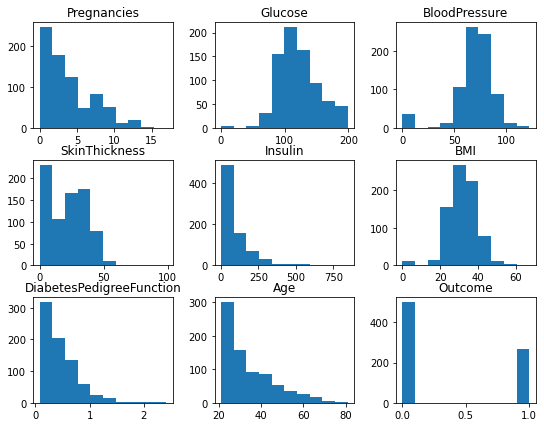

In [114]:
# Histogramas
diabetes.hist(bins=10,figsize=(9,7),grid=False);

## Preparación de datos

In [ ]:
# Creamos una nueva lista de diabetes con la que se trabajará
diabetes_prep = diabetes 

<AxesSubplot:>

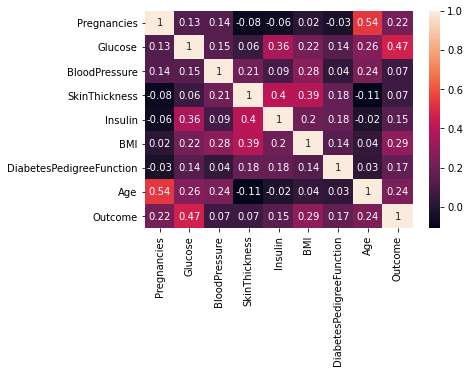

In [90]:
# Primero se eliminarán las columnas que estén menos relacionadas con diabetes, para esto observemos el mapa de calor.
sns.heatmap(data=diabetes_prep.corr().round(2), annot=True) # Mapa de calor

In [101]:
# Notamos que SkinThickness y BloodPressure son las columnas que menos se relacionan con la diabetes según el mapa de calor.
# Por esta razón, eliminamos estas columnas dentro de nuestra nueva lista de datos. Además eliminamos el Outcome porque es 
# lo que buscamos obtener.
diabetes_prep = diabetes.drop(['BloodPressure','SkinThickness','Outcome'], axis=1)

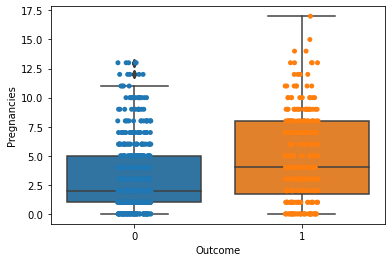

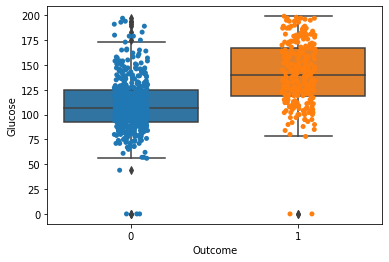

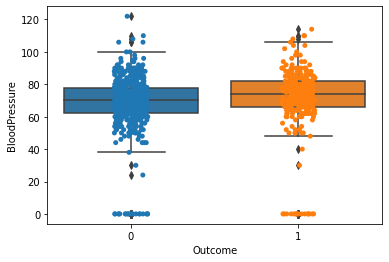

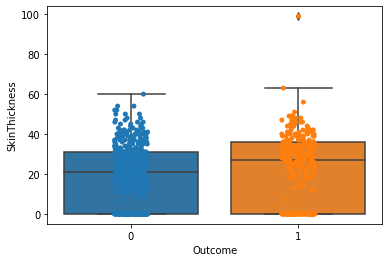

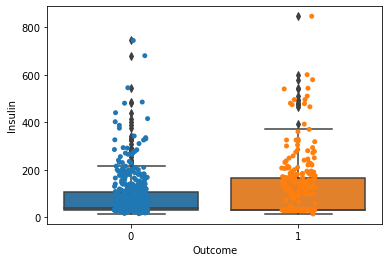

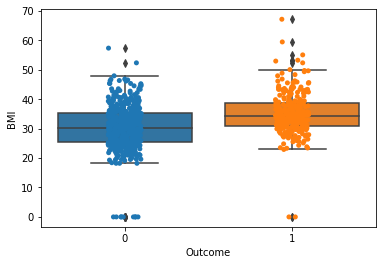

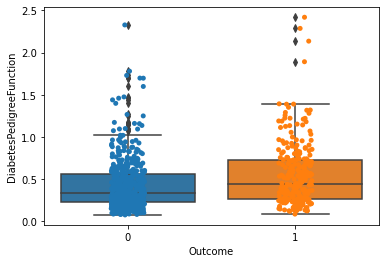

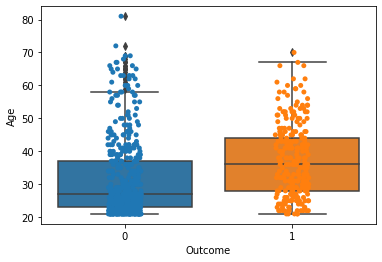

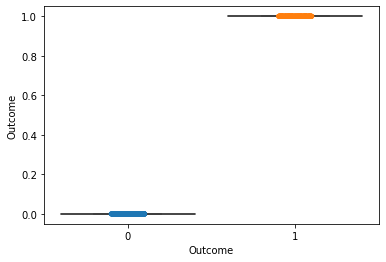

In [93]:
columna = diabetes.columns.values
for i in columna:
    ax = sns.boxplot(x="Outcome", y=i, data=diabetes)
    ax = sns.stripplot(x="Outcome", y=i, data=diabetes, jitter=True, edgecolor="gray") # Agrega puntos
    plt.show()

In [94]:
# Ver datos faltantes para completarlos
diabetes.isnull().sum()
# Notamos que no falta ningún dato pero hay muchos datos con valor de 0 (en los diagrama de cajas y bigotes se aprecia esto)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
# Para los datos que no pueden ser 0, los cambiamos por la mediana (a excepción de pregnancies)

columna = diabetes_prep.columns.values

for encabezado in columna:
    diabetes_prep[encabezado] = diabetes_prep[encabezado].replace({0:diabetes[encabezado].median()})

diabetes_prep['Pregnancies'] = diabetes['Pregnancies'] # Reestablece Pregnancies a sus valores originales
diabetes_prep.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,30.5,33.6,0.627,50
1,1,85.0,30.5,26.6,0.351,31
2,8,183.0,30.5,23.3,0.672,32
3,1,89.0,94.0,28.1,0.167,21
4,0,137.0,168.0,43.1,2.288,33


## K-Means de datos

[[  3.6        143.89230769 280.38461538  35.16461538   0.5986
   33.89230769]
 [  3.89498433 117.12539185  56.80721003  31.89796238   0.44605486
   33.10815047]]


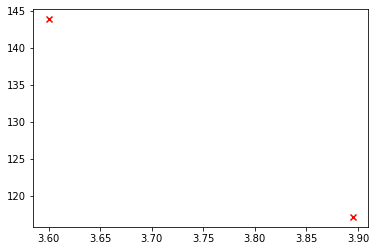

In [118]:
# Teniendo nuestros datos preparados, solo falta encontrar nuestros centroides y clasificar los datos en un clúster.
kmeans = KMeans(n_clusters=2) # Como queremos determinar si las personas murieron o no, se tienen que crear 2 grupos.
kmeans.fit(diabetes_prep)
print(kmeans.cluster_centers_) # Impresión de centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x') # Gráfica de centroides

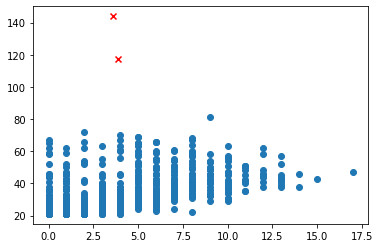

In [106]:
arreglo = np.array(diabetes_prep)
plt.scatter(arreglo[:, 0], arreglo[:, -1]) # Gráfica de datos
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x') # Gráfica de centroides

In [107]:
# Impresión de datos clasificados a los centroides
print(kmeans.labels_)
diabetes_0 = 0
diabetes_1 = 0

for categoria in kmeans.labels_:
    if (categoria == 0):
        diabetes_0 = diabetes_0 + 1
    else:
        diabetes_1 = diabetes_1 + 1
print("\nCantidad categoría 0:",diabetes_0,"\nCantidad categoría 1:",diabetes_1)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 

## Preguntas

#### ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
La función kmeans enlaza los datos parecidos, pero no creo que sean representativos de los datos. Esto porque la mayoría de datos de acuerdo al mapa de calor, no son muy parecidos y no están casi correlacionados y es lógico porque que una persona tenga un alto índice de masa corporal o tenga alta glucosa, no significa que tenga diabetes.

In [111]:
ceros = 0
unos = 0
for dato in diabetes['Outcome']:
    if (dato == 0):
        ceros = ceros + 1
    elif (dato == 1):
        unos = unos + 1
print("Personas con diabetes:", unos, "\nPersonas sin diabetes:",ceros)

Personas con diabetes: 268 
Personas sin diabetes: 500


Además, notemos que según los datos originales, 268 personas contaban con diabetes y 500 no contaban con diabetes. Esto contra las 130 y 638 obtenidas de la función kmeans y con datos que se consideraron relevantes usar. Por lo que con estos datos que no están muy correlacionados, entonces definitamente los datos no son definitivos al dar un veredicto/resultado.

#### ¿Cómo obtuviste el valor de k a usar?
El valor de k viene dado al buscar las personas que tienen diabetes o no, esto es, 2 opciones en total (2 clústers o centroides).

#### ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Si tuvieramos datos con mayor correlación, sería más representativo los datos al tener mayor concordancia. Los datos se juntarían en grupos con más probabilidad de certeza. La función kmeans relacionaría estos datos mejor.
Tener más datos no influencía casi en tener datos más representativos, esto pues entre menos datos aleatorios se tengan, mayor desviación en los resultados (al no tomar en cuenta todas las posibilidades).

#### ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

In [125]:
distancia = (kmeans.cluster_centers_[0]-kmeans.cluster_centers_[1])**2;
distancia = sum(distancia)**(1/2)
print("Distancia entre los dos centroides:",distancia)

Distancia entre los dos centroides: 225.19928991538094


Como solo tenemos 2 centroides, no podemos comparar con otros y determinar si están alejanos o cercanos.

#### ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Entre más dispersos los datos, más dispersos los resultados. De esta manera, los grupos serían más imprecisos y no estarían correctos en su mayoría.

#### ¿Qué puedes decir de los datos basándose en los centros?
Los datos no están tan cerca de los centros. Estos se encuentran dispersos y por lo tanto se puede concluir que nuestro "Outcome" o resultado, no es muy preciso.